In [23]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [24]:
train=pd.read_csv(r"C:\Users\NTCUONG\notebook\train.csv")
test=pd.read_csv(r"C:\Users\NTCUONG\notebook\test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
random_state=42
def preprocess(df,mode,imputer,normalize,encoder,pca,train_test_split):
    if mode==True:
        df=df.drop(columns=["Ticket","Cabin","Name","PassengerId"])
        if imputer!="NONE":
            df["Age"]=imputer.fit_transform(df["Age"].to_numpy().reshape(-1,1))
        if encoder=="OneHotEncoder":
            df=pd.get_dummies(df,columns=["Embarked","Sex","Pclass"],dummy_na=True,dtype="float")
        else:
            label_enc=LabelEncoder()
            df["Embarked"]=df["Embarked"].fillna("unknow")
            df["Pclass"]=df["Pclass"].astype(str)
            df["Sex"]=label_enc.fit_transform(df["Sex"])
            df["Pclass"]=label_enc.fit_transform(df["Pclass"])
            df["Embarked"]=label_enc.fit_transform(df["Embarked"])
        return df
        
    else:
        X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=random_state)
        if normalize!="NONE":
            X_train=normalize.fit_transform(X_train)
            X_test=normalize.transform(X_test)
        if pca!="NONE":
            X_train=pca.fit_transform(X_train)
            X_test=pca.transform(X_test)
        return X_train,X_test,y_train,y_test
        

In [27]:
def add_data(statistic,model,ipt,encoder,norm,mode_pca,y_test,y_pre):
    statistic["MODEL"].append(model)
    statistic["IMPUTATION"].append(ipt)
    statistic["ENCODER"].append(encoder)
    statistic["NOMALIZATION"].append(norm)
    statistic["PCA"].append(mode_pca)
    statistic["accuracy_score"].append(accuracy_score(y_test,y_pre))
    statistic["precision_score"].append(precision_score(y_test,y_pre))
    statistic["recall_score"].append(recall_score(y_test,y_pre))
    statistic["f1_score"].append(f1_score(y_test,y_pre))


In [28]:
# MODEL LOGISTIC REGRESSION
pca=PCA(n_components=2)
model_list={"LogisticRegression":LogisticRegression(max_iter=100),"DecisionTree":DecisionTreeClassifier(),"AdaBoost":AdaBoostClassifier(),"RandomForest":RandomForestClassifier()}
# IMPUTER
imputer_list={"SimpleImputer":SimpleImputer(strategy='mean'),"KNNImputer":KNNImputer(n_neighbors=3),"IterativeImputer":IterativeImputer(estimator=LinearRegression(),max_iter=100)}
# METRICS
metric_list=[accuracy_score,precision_score,recall_score,f1_score]
# NOMALIZATION
nomalizer_list={"NONE":"NONE","MinMaxScaler":MinMaxScaler(),"RobustScaler":RobustScaler(),"StandardScaler":StandardScaler()}
# ENCODER
encoder_list=['LabelEncoder','OneHotEncoder']
pca_list=["APPLY","NONE"]

<!-- statistic={"MODEL":[],"IMPUTATION":[],"ENCODER":[],"NOMALIZATION":[],"PCA(2_components)":[],"accuracy_score":[],"precision_score":[],"recall_score":[],"f1_score":[]}

for model in model_list:
    m=model
    for imputer in imputer_list:
        ipt=imputer
        for encoder in encoder_list:
            enc=encoder
            train_process=preprocess_dataset(train,ipt,"NONE",enc,False)
            for normalizer in nomalizer_list:
                norm=normalizer
                for mode_pca in pca_setup:
                    print(ipt,norm,enc,mode_pca)
                    train_trans=preprocess_dataset(train,ipt,norm,enc,mode_pca)
                    if mode_pca==False:
                        for metric in metric_list:
                            mt=metric
                            if norm=="NONE":
                                m.fit(X_train,y_train)
                                y_pred=m.predict(X_test)
                                result=mt(y_pred,y_test)
                                statistic["MODEL"].append(m)
                                statistic["IMPUTATION"].append(ipt)
                                statistic["ENCODER"].append(enc)
                                statistic["NOMALIZATION"].append(norm)
                                statistic[str(mt.__name__)].append(result)
                            else:
                                X_train_transed=norm.fit_transform(X_train)
                                X_test_transed=norm.transform(X_test)
                                m.fit(X_train_transed,y_train)
                                y_pred=m.predict(X_test_transed)
                                result=mt(y_pred,y_test)
                                statistic["MODEL"].append(m)
                                statistic["IMPUTATION"].append(ipt)
                                statistic["ENCODER"].append(enc)
                                statistic["NOMALIZATION"].append(norm)
                                statistic[str(mt.__name__)].append(result)
                    else:
                        if norm=="NONE":
                            train_pca=pca.fit_transform(X_train)
                            test_pca=pca.transform(X_test)
                            for metric in metric_list:
                                mt=metric
                                m.fit(train_pca,y_train)
                                y_pred=m.predict(test_pca)
                                result=mt(y_pred,y_test)
                                statistic["MODEL"].append(m)
                                statistic["IMPUTATION"].append(ipt)
                                statistic["ENCODER"].append(enc)
                                statistic["NOMALIZATION"].append(norm)
                                
                                statistic[str(mt.__name__)].append(result)
                        else:
                            print(norm)
                            X_train_transed=norm.fit_transform(X_train)
                            X_test_transed=norm.transform(X_test)
                            train_pca=pca.fit_transform(X_train_transed)
                            test_pca=pca.tranform(X_test_transed)
                            m.fit(train_pca,y_train)
                            y_pred=m.predict(test_pca)
                            for metric in metric_list:
                                result=mt(y_pred,y_test)
                                statistic["MODEL"].append(m)
                                statistic["IMPUTATION"].append(ipt)
                                statistic["ENCODER"].append(enc)
                                statistic["NOMALIZATION"].append(norm)
                                statistic[str(mt.__name__)].append(result)
                                    
                         -->

In [29]:
statistic={"PCA":[],"MODEL":[],"IMPUTATION":[],"ENCODER":[],"NOMALIZATION":[],"accuracy_score":[],"precision_score":[],"recall_score":[],"f1_score":[]}
for mode_pca in pca_list:
    if mode_pca=="APPLY":
        for i in range (2,7):
            pca=PCA(n_components=i)
            for model_str,model in model_list.items():
                m=model
                for imputer_str,imputer in imputer_list.items():
                    ipt=imputer
                    for encoder in encoder_list:
                        enc=encoder
                        processed_df=preprocess(train,True,ipt,"NONE",enc,"NONE","NONE")
                        for norm_str,normalizer in nomalizer_list.items():
                            norm=normalizer
                            X_train,X_test,y_train,y_test=preprocess(processed_df,False,"NONE",norm,"NONE",pca,train_test_split)
                            m.fit(X_train,y_train)
                            y_pre=m.predict(X_test)
                            add_data(statistic,model_str,imputer_str,enc,norm_str,"{} COMPONENTS".format(i),y_test,y_pre)
    else:
        for model_str,model in model_list.items():
                m=model
                for imputer_str,imputer in imputer_list.items():
                    ipt=imputer
                    for encoder in encoder_list:
                        enc=encoder
                        processed_df=preprocess(train,True,ipt,"NONE",enc,"NONE","NONE")
                        for norm_str,normalizer in nomalizer_list.items():
                            norm=normalizer
                            X_train,X_test,y_train,y_test=preprocess(processed_df,False,"NONE",norm,"NONE","NONE",train_test_split)
                            m.fit(X_train,y_train)
                            y_pre=m.predict(X_test)
                            add_data(statistic,model_str,imputer_str,enc,norm_str,"NONE",y_test,y_pre)                                           

In [30]:
df_train=train.copy()

In [31]:
cnt_mr=0
cnt_mrs=0
cnt_dr=0
cnt_miss=0
cnt_master=0
special=0
for st in df_train["Name"].values:
    if ", Mrs." in st:
        cnt_mrs+=1
    elif ", Mr." in st:
        cnt_mr+=1
    elif ", Dr." in st:
        cnt_dr+=1
    elif ", Master." in st:
        cnt_master+=1
    elif ", Miss." in st:
        cnt_miss+=1
    else:
        special+=1
print("MR:",cnt_mr)
print("MRS:",cnt_mrs)
print("Dr",cnt_dr)
print("Miss:",cnt_miss)
print("Master:",cnt_master)
print("Special",special)
print(cnt_dr+cnt_master+cnt_miss+special+cnt_mrs+cnt_mr)

MR: 517
MRS: 125
Dr 7
Miss: 182
Master: 40
Special 20
891


In [32]:
avg_mrs=df_train.loc[df_train["Name"].str.contains(", Mrs.")].Age.mean()
avg_mr=df_train.loc[df_train["Name"].str.contains(", Mr.")].Age.mean()
avg_miss=df_train.loc[df_train["Name"].str.contains(", Miss.")].Age.mean()
avg_dr=df_train.loc[df_train["Name"].str.contains(", Dr.")].Age.mean()
avg_master=df_train.loc[df_train["Name"].str.contains(", Master.")].Age.mean()

In [33]:
df_train.update(df_train.loc[df_train["Name"].str.contains(", Mrs.") & df_train["Age"].isna()].fillna(avg_mrs))
df_train.update(df_train.loc[df_train["Name"].str.contains(", Mr.") & df_train["Age"].isna()].fillna(avg_mr))
df_train.update(df_train.loc[df_train["Name"].str.contains(", Miss.") & df_train["Age"].isna()].fillna(avg_miss))
df_train.update(df_train.loc[df_train["Name"].str.contains(", Master.") & df_train["Age"].isna()].fillna(avg_master))
df_train.update(df_train.loc[df_train["Name"].str.contains(", Dr.") & df_train["Age"].isna()].fillna(avg_dr))

In [34]:
df_train.loc[df_train["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:

for mode_pca in pca_list:
    if mode_pca=="APPLY":
        for i in range(2,7):
            pca=PCA(n_components=i)
            for model_str,model in model_list.items():
                m=model
                for encoder in encoder_list:
                    enc=encoder
                    processed_df=preprocess(df_train,True,"NONE","NONE",enc,"NONE","NONE")
                    for norm_str,normalizer in nomalizer_list.items():
                        norm=normalizer
                        X_train,X_test,y_train,y_test=preprocess(processed_df,False,"NONE",norm,"NONE",pca,train_test_split)
                        m.fit(X_train,y_train)
                        y_pre=m.predict(X_test)
                        add_data(statistic,model_str,"DEPEND ON NAME",enc,norm_str,"{} COMPONENTS".format(i),y_test,y_pre)
    else:
        for model_str,model in model_list.items():
            m=model
            for encoder in encoder_list:
                enc=encoder
                processed_df=preprocess(df_train,True,"NONE","NONE",enc,"NONE","NONE")
                for norm_str,normalizer in nomalizer_list.items():
                    norm=normalizer
                    X_train,X_test,y_train,y_test=preprocess(processed_df,False,"NONE",norm,"NONE","NONE",train_test_split)
                    m.fit(X_train,y_train)
                    y_pre=m.predict(X_test)
                    add_data(statistic,model_str,"DEPEND ON NAME",enc,norm_str,"NONE",y_test,y_pre)
                                                    

In [36]:
statistic_df=pd.DataFrame(statistic)

In [37]:
statistic_df.to_csv("statistic1.csv")

* Imputer trên data raw  ->1 model => đánh giá xem cái nào tốt nhất thì chọn
* encode trên data raw ->1 model => đánh giá xem cái nào tốt nhất thì chọn
=> imputer toost nhaast + encode tốt nhất
* scale apply trên data ipt+encode tốt nhất => scatter plot để đánh giá phân phối => đặc điểm từng scaler
* tìm hiểu ft selection
* run tổ hợp theo các scaler và ft selection + num_feat
* feature selection
* optimize code (clean code,optimize)
* encoder Pclass
* Pca k components

In [38]:
statistic_df.sort_values("f1_score",ascending=False)

,PCA,MODEL,IMPUTATION,ENCODER,NOMALIZATION,accuracy_score,precision_score,recall_score,f1_score
763,NONE,RandomForest,DEPEND ON NAME,LabelEncoder,StandardScaler,0.837989,0.808219,0.797297,0.802721
468,6 COMPONENTS,RandomForest,KNNImputer,OneHotEncoder,NONE,0.837989,0.816901,0.783784,0.800000
568,NONE,RandomForest,IterativeImputer,LabelEncoder,NONE,0.832402,0.814286,0.770270,0.791667
552,NONE,RandomForest,SimpleImputer,LabelEncoder,NONE,0.832402,0.823529,0.756757,0.788732
766,NONE,RandomForest,DEPEND ON NAME,OneHotEncoder,RobustScaler,0.826816,0.802817,0.770270,0.786207
...,...,...,...,...,...,...,...,...,...
580,2 COMPONENTS,LogisticRegression,DEPEND ON NAME,OneHotEncoder,NONE,0.648045,0.761905,0.216216,0.336842
8,2 COMPONENTS,LogisticRegression,KNNImputer,LabelEncoder,NONE,0.648045,0.761905,0.216216,0.336842
4,2 COMPONENTS,LogisticRegression,SimpleImputer,OneHotEncoder,NONE,0.648045,0.761905,0.216216,0.336842
576,2 COMPONENTS,LogisticRegression,DEPEND ON NAME,LabelEncoder,NONE,0.648045,0.761905,0.216216,0.336842


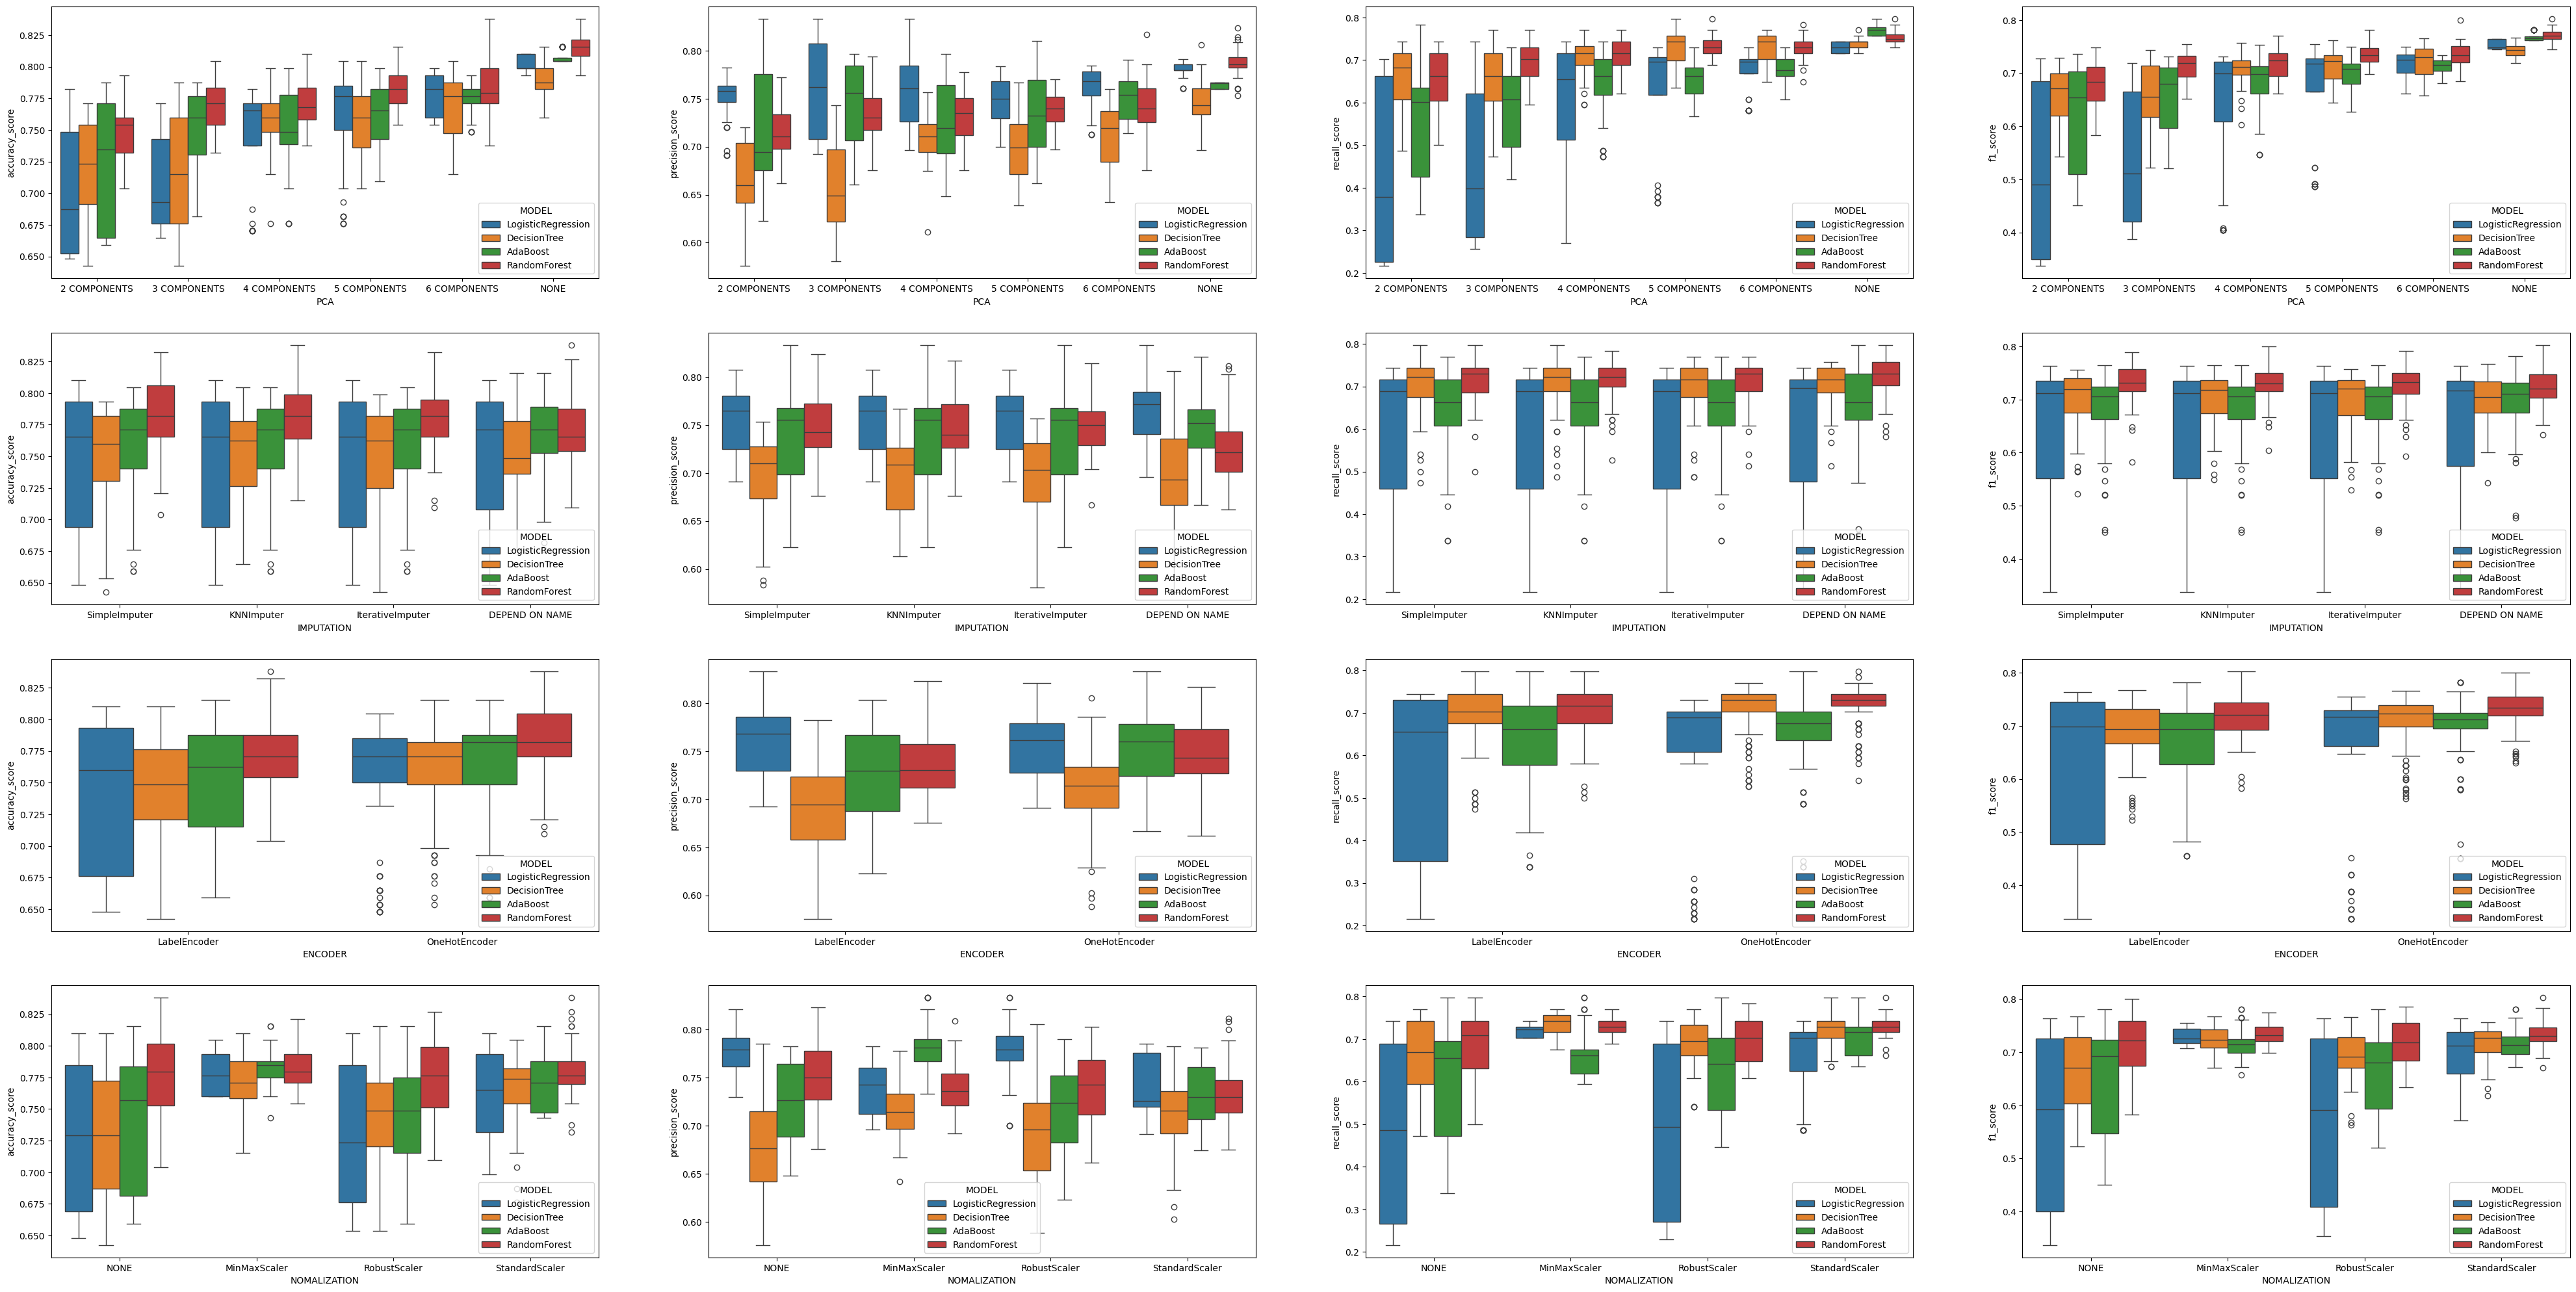

In [39]:
statistic_LgR=statistic_df.loc[statistic_df["MODEL"]=="LogisticRegression"]
metrics=["accuracy_score","precision_score","recall_score","f1_score"]
features=["PCA","IMPUTATION","ENCODER","NOMALIZATION"]
def plot_result(features,metrics):
    i,j=0,0
    fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(50,25))
    for feature in features:
        if i==4:
            i=0
        for metric in metrics:
            if j==4:
                j=0
            sns.boxplot(data=statistic_df,x=feature,y=metric,hue="MODEL",ax=ax[i][j])
            j+=1
        i+=1
plot_result(features,metrics)
        
